# A Time Series Analysis of the Spread of Corona Virus In France

Verifying the working directory

In [4]:
getwd()

[1] "C:/Users/karel/OneDrive/Documents/Meine Unterlagen/Skool/Meine_Vorhaben/R/data_set"

I start the process by accessing my working directory

In [5]:
setwd("C:/Users/karel/OneDrive/Documents/Meine Unterlagen/Skool/Meine_Vorhaben/R/data_set")

In [10]:
#importing the necessary package needed for this time series analysis
install.packages("forecast")
install.packages("stats")


  There is a binary version available but the source version is later:
         binary source needs_compilation
forecast   8.14   8.16              TRUE

  Binaries will be installed


Warning message:
"package 'forecast' is in use and will not be installed"Warning message:
"package 'stats' is not available (for R version 3.6.1)"Warning message:
"package 'stats' is a base package, and should not be updated"

In [12]:
library(forecast)
library(stats)

In [13]:
#Importing the data set
d = read.csv2("open_stats_coronavirus.csv", sep=";")

In [15]:
# Getting a general idea about the data
summary(d)

         date             code                 nom             cas          
 2020-03-24:   190   P11    :   693   La RÃ©union: 1060   Min.   :       0  
 2020-03-25:   190   P2     :   690   Guadeloupe : 1047   1st Qu.:   16093  
 2020-03-23:   189   P10    :   685   Guyane     : 1046   Median :  212111  
 2020-03-22:   188   P4     :   685   Martinique : 1046   Mean   : 1677440  
 2020-03-27:   188   P5     :   685   Mayotte    : 1043   3rd Qu.: 1142716  
 2020-03-21:   187   P6     :   684   coree      :  693   Max.   :59767221  
 (Other)   :104102   (Other):101112   (Other)    :99299   NA's   :61037     
     deces            guerisons       
 Min.   :     0.0   Min.   :       0  
 1st Qu.:    90.0   1st Qu.:     475  
 Median :   441.5   Median :    1903  
 Mean   : 16559.6   Mean   :  255948  
 3rd Qu.:  3191.0   3rd Qu.:   14989  
 Max.   :975886.0   Max.   :40070000  
 NA's   :1656       NA's   :13233     
                                                        source     
 San

##### Data Cleaning 

The date column is converted to a date format to be able to do a time series analysis 

In [19]:
# We do data cleaning

d$date = as.Date(d$date)
d$cas = as.numeric(d$cas)
d$deces = as.numeric(d$deces)
d$guerisons = as.numeric(d$guerisons)
summary(d)

      date                 code                  nom             cas          
 Min.   :2020-02-25   P62    :  520   lettonie     :  520   Min.   :       1  
 1st Qu.:2020-07-21   P16    :  513   estonie      :  513   1st Qu.:   15095  
 Median :2020-11-24   P61    :  513   japon        :  513   Median :  135821  
 Mean   :2020-11-23   P40    :  512   cote_d_ivoire:  512   Mean   : 1128108  
 3rd Qu.:2021-03-28   P57    :  509   ukraine      :  509   3rd Qu.:  773079  
 Max.   :2021-09-01   P46    :  508   indonesie    :  508   Max.   :44933850  
                      (Other):28332   (Other)      :28332                     
     deces            guerisons       
 Min.   :     0.0   Min.   :       0  
 1st Qu.:   227.5   1st Qu.:    5000  
 Median :  3061.0   Median :   57500  
 Mean   : 28182.8   Mean   :  743562  
 3rd Qu.: 21718.0   3rd Qu.:  409084  
 Max.   :975886.0   Max.   :40070000  
                                      
                                                        

[1] 31407     7

In [27]:
# In this siuation, we dicide to remove missing values because it will not affect the analysis
d_clean = na.omit(d)

In [26]:
summary(d_clean)

      date                 code                  nom             cas          
 Min.   :2020-02-25   P62    :  520   lettonie     :  520   Min.   :       1  
 1st Qu.:2020-07-21   P16    :  513   estonie      :  513   1st Qu.:   15095  
 Median :2020-11-24   P61    :  513   japon        :  513   Median :  135821  
 Mean   :2020-11-23   P40    :  512   cote_d_ivoire:  512   Mean   : 1128108  
 3rd Qu.:2021-03-28   P57    :  509   ukraine      :  509   3rd Qu.:  773079  
 Max.   :2021-09-01   P46    :  508   indonesie    :  508   Max.   :44933850  
                      (Other):28332   (Other)      :28332                     
     deces            guerisons       
 Min.   :     0.0   Min.   :       0  
 1st Qu.:   227.5   1st Qu.:    5000  
 Median :  3061.0   Median :   57500  
 Mean   : 28182.8   Mean   :  743562  
 3rd Qu.: 21718.0   3rd Qu.:  409084  
 Max.   :975886.0   Max.   :40070000  
                                      
                                                        

In this work, we will focus our analysis on the corona cases(cas)

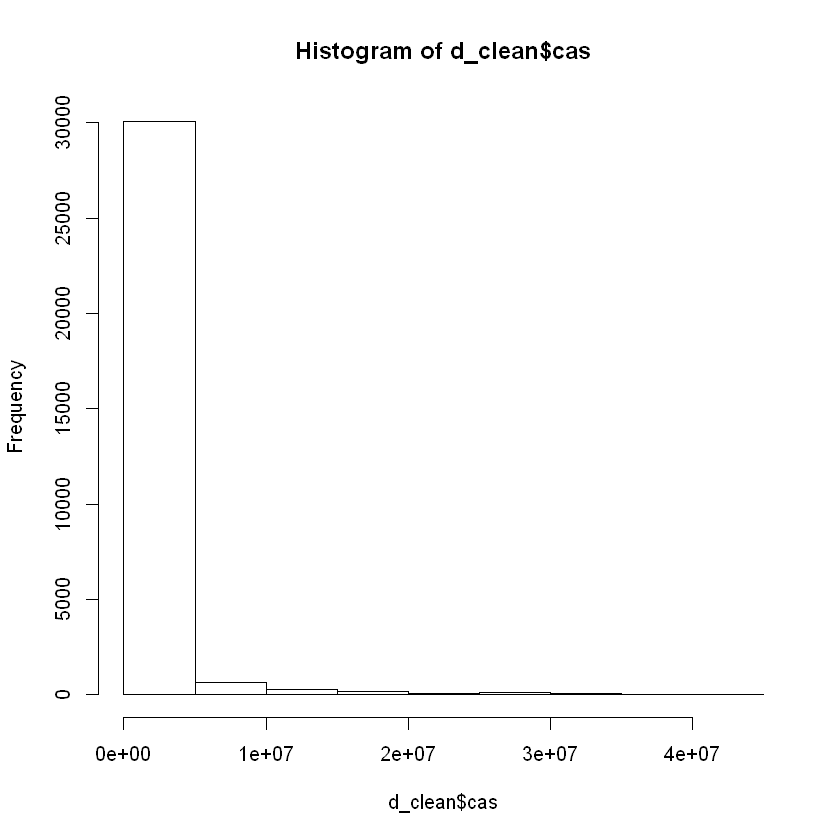

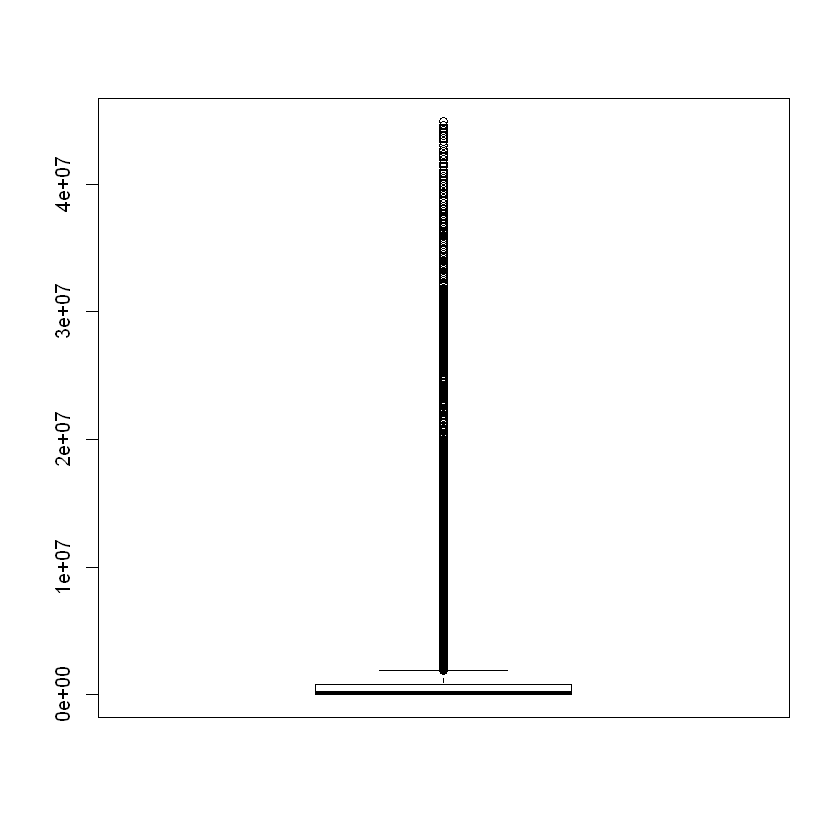

In [32]:
# plotting the data
hist(d_clean$cas)
boxplot(d_clean$cas)

The diagrams display above show that the data is not evenly dispersed. Let's evaluate the proportion of dispersion to confirm that

In [31]:
# We eveluate the the proportio of dispersion and observed that the it's disperses at more than 300%. This can be due to the 
# fact that there are some period of the year during which we have more cases
sd(d_clean$cas)/mean(d_clean$cas)*100

[1] 304.5695

In [39]:
# We take a smaple of the data set to have a clear analysis

d1=tail(d_clean,40*4)
summary(da$cas)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
     3.0    262.8    729.5  15882.3   1741.8 305275.0 

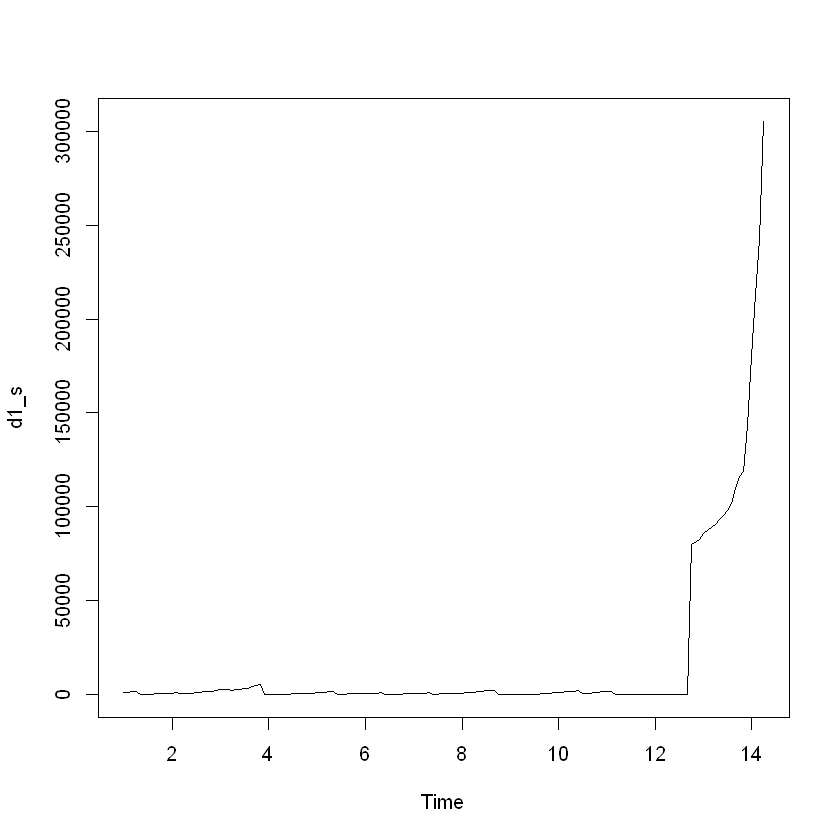

In [44]:
# We transform the data in time series
d1_s = ts(d1$cas, frequency = 12)
plot(d1_s)

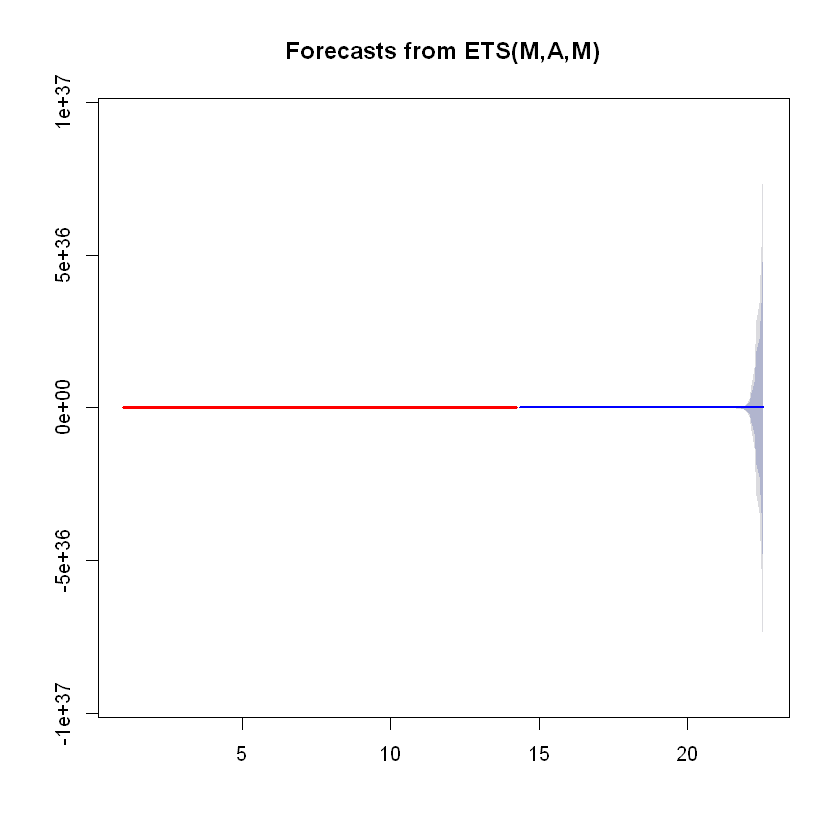

In [48]:
d1_ets = forecast(ets(d1_s), h=100)
plot(d1_ets, col="red",lwd=3)

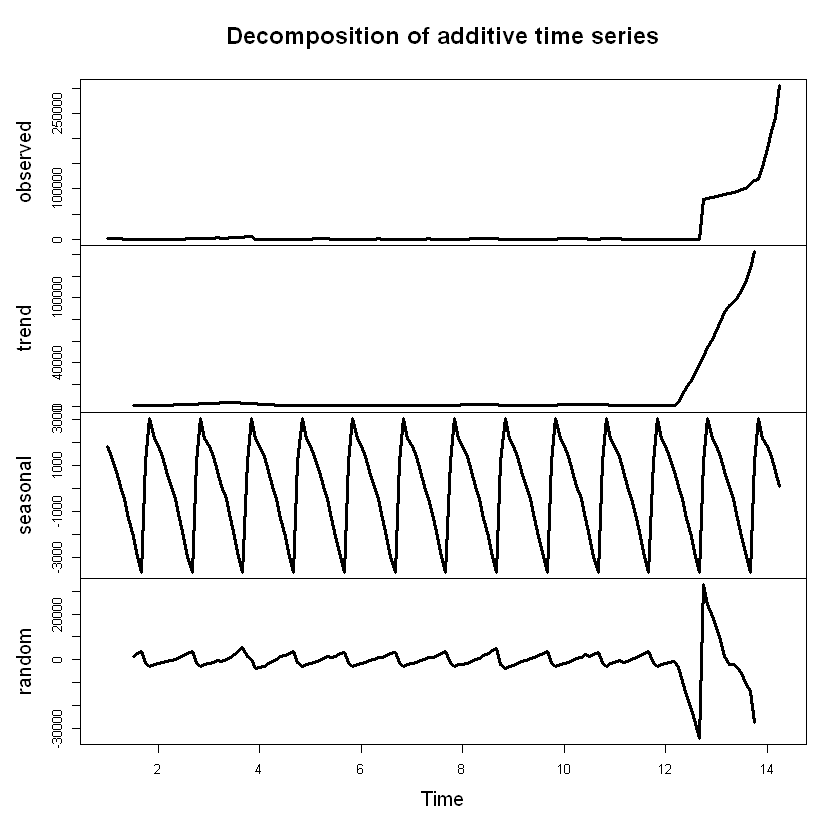

In [46]:
d_decom = decompose(d1_s)
plot(d_decom,lwd=3)

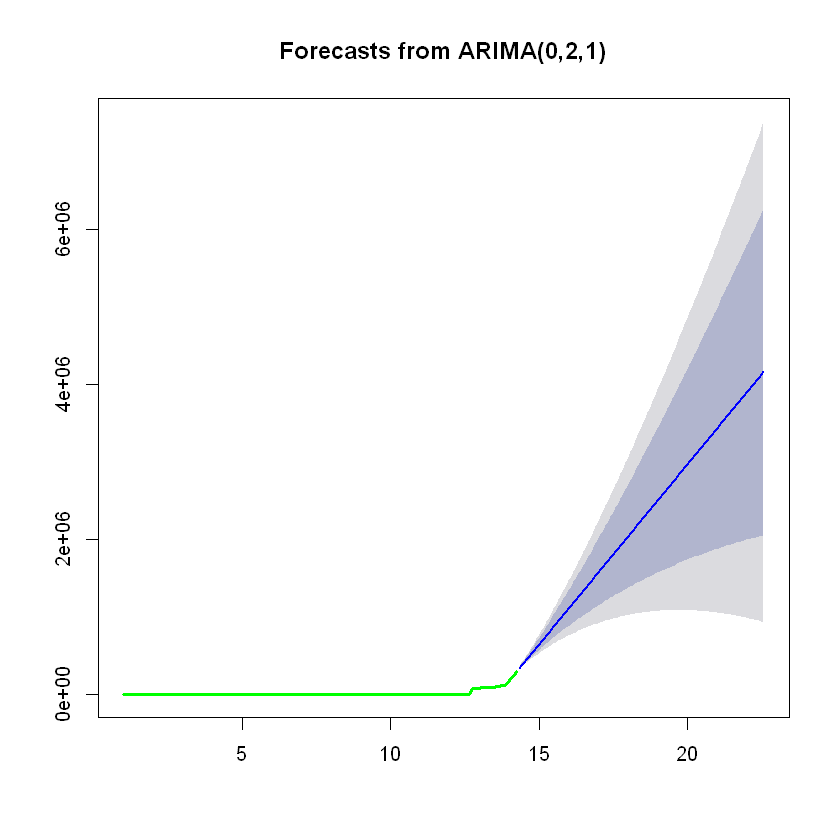

In [47]:
# We compare these result using the arima model
d1_a = forecast(auto.arima(d1_s), h=100)
plot(d1_a,col="green",lwd=3)

This shows us that the arima and ets model gives the same results

Analysing the number of cases in France

In [52]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [55]:
d_france = d_clean%>%filter(nom =="france")
summary(d_france)

      date                 code                 nom           cas         
 Min.   :2020-03-24   P1     :482   france        :482   Min.   :  22302  
 1st Qu.:2020-08-05   COM-974:  0   afrique       :  0   1st Qu.: 195002  
 Median :2020-12-21   COM-977:  0   afrique_du_sud:  0   Median :2485048  
 Mean   :2020-12-13   COM-978:  0   Ain           :  0   Mean   :2734384  
 3rd Qu.:2021-04-20   COM-986:  0   Aisne         :  0   3rd Qu.:5365787  
 Max.   :2021-09-01   COM-987:  0   algerie       :  0   Max.   :6783329  
                      (Other):  0   (Other)       :  0                    
     deces          guerisons     
 Min.   :  1100   Min.   :  3281  
 1st Qu.: 30310   1st Qu.: 82554  
 Median : 61301   Median :185261  
 Mean   : 64021   Mean   :200547  
 3rd Qu.:101810   3rd Qu.:325349  
 Max.   :114577   Max.   :408908  
                                  
                                              source   
 SantÃ© Publique France                          :482  
        

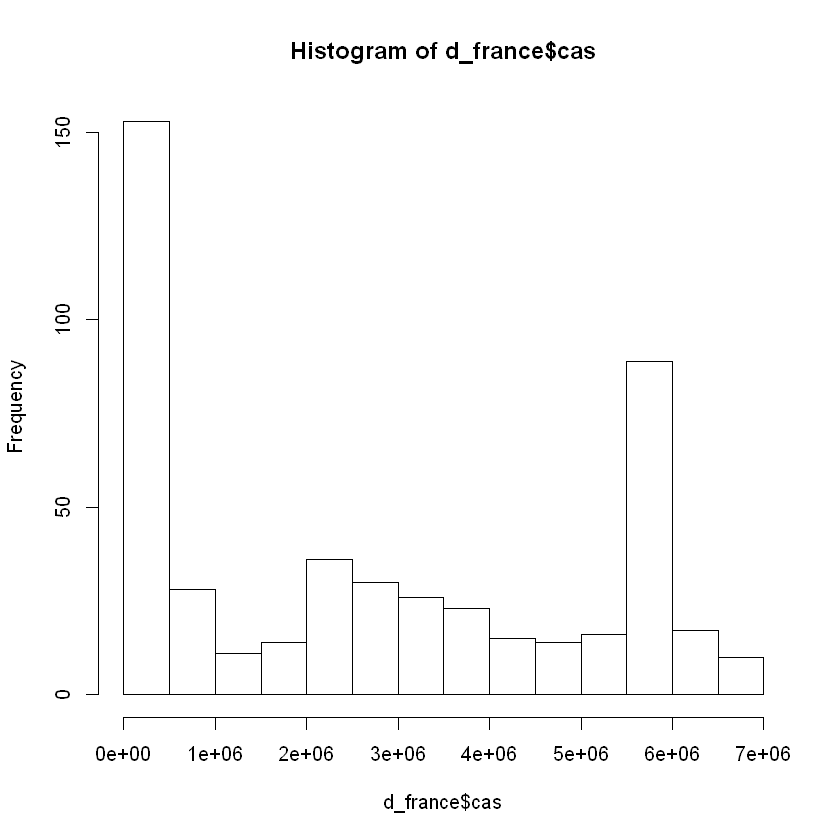

In [56]:
hist(d_france$cas)

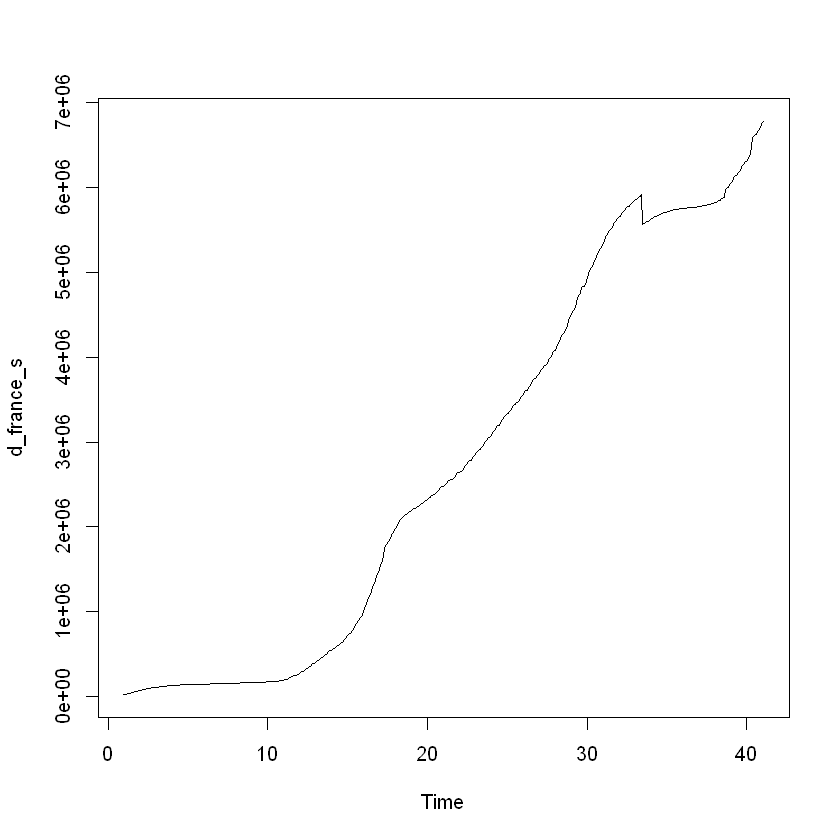

In [60]:
# We transform the data in time series
d_france_s = ts(d_france$cas, frequency = 12)
plot(d_france_s)

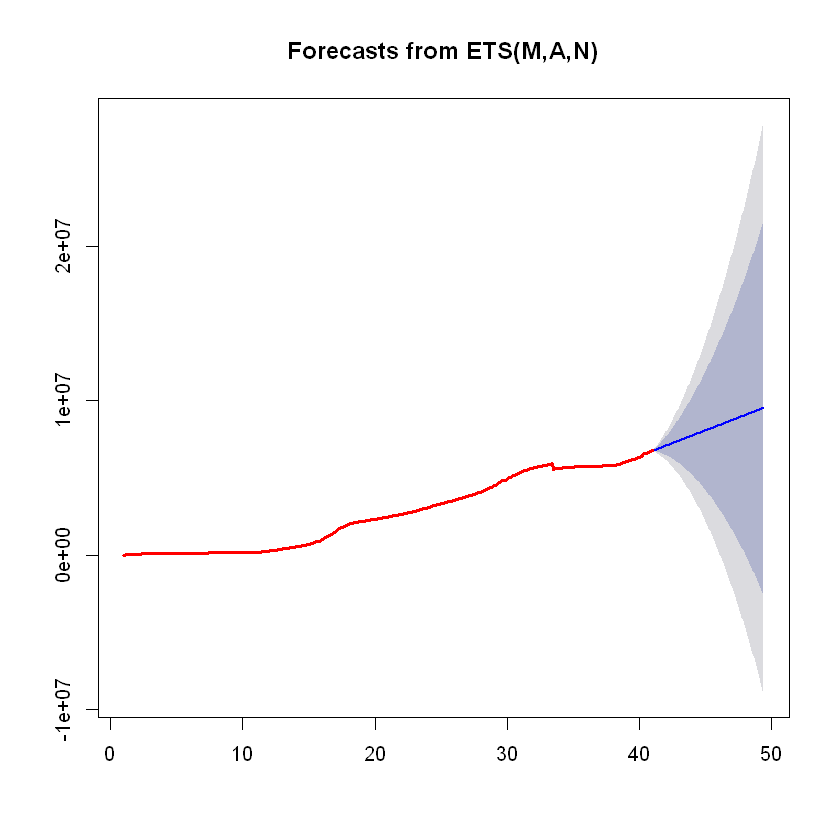

In [61]:
d_france_ets = forecast(ets(d_france_s), h=100)
plot(d_france_ets, col="red",lwd=3)

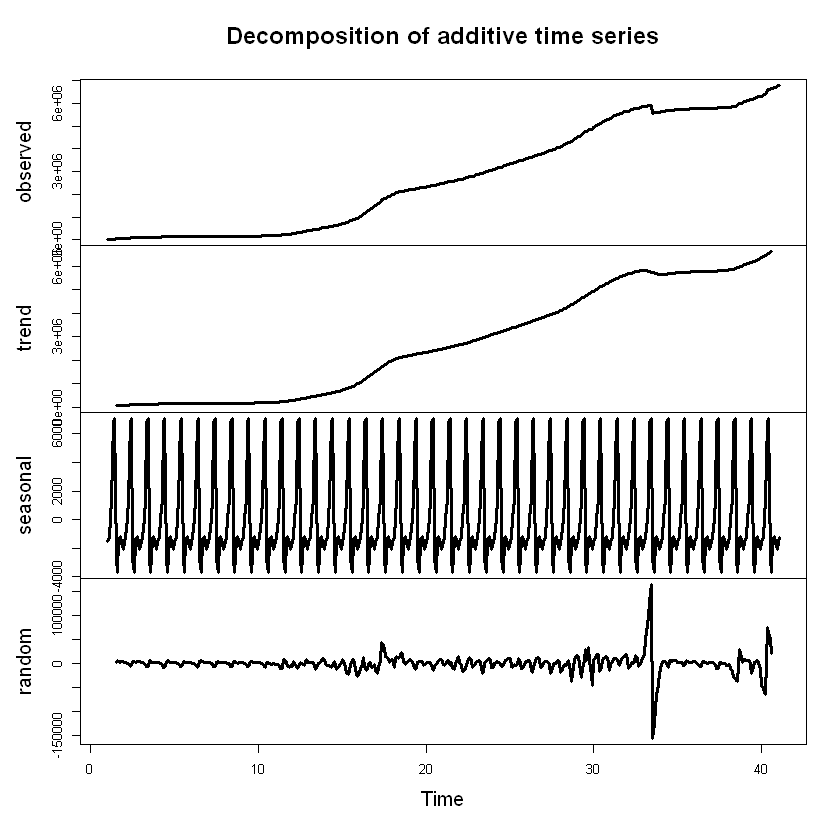

In [62]:
d_france_decom = decompose(d_france_s)
plot(d_france_decom,lwd=3)

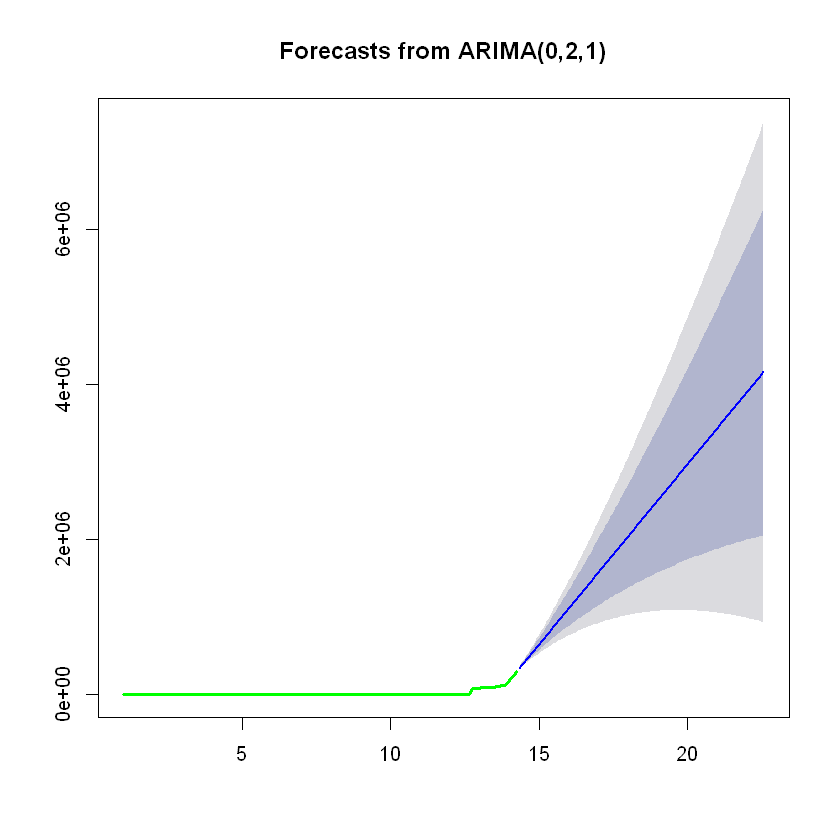

In [63]:
# We compare these result using the arima model
d_france_a = forecast(auto.arima(d_france_s), h=100)
plot(d1_a,col="green",lwd=3)

We can see that What happened in France is a reflection of what we obained up with the world's population. 
Therefore one can say that there are period of the year when the number of cases increae exponentially. 
As shown by all the analysis shown above